In [1]:
from muler.igrins import IGRINSSpectrum, IGRINSSpectrumList
import matplotlib.pylab as plt
import astropy.units as u

In [8]:
path = 'https://github.com/OttoStruve/muler_example_data/raw/main/IGRINS/03_IGRINS_test_data/'

file = path + 'SDCK_20141125_0127.rtell_K.spec_a0v.fits'
file_ori = path + 'SDCK_20141125_0127.spec_a0v.fits'

In [9]:
spec = IGRINSSpectrum(file = file, order = 17) #this retell file is already BVC
spec_ori = IGRINSSpectrum(file = file_ori, order = 17).rv_shift(5.8800489484979295 * u.km / u.s)

Text(0.5, 0, 'Wavelength [A]')

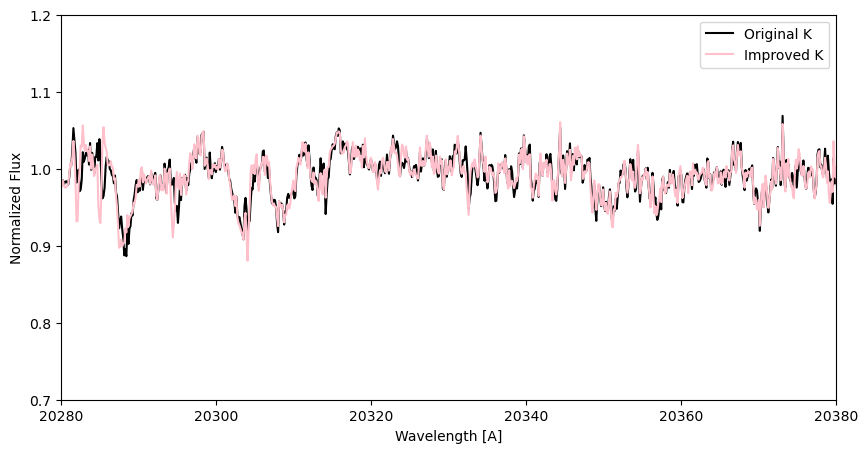

In [10]:
fig = plt.figure(figsize = (10,5), dpi = 100, facecolor = 'white')
ax = plt.subplot(111)

ax.plot(spec_ori.wavelength, spec_ori.normalize().flux, color = 'k', label = 'Original K')
ax.plot(spec.wavelength, spec.normalize().flux, c = 'pink', label = 'Improved K')

ax.set_ylim(0.7, 1.2)
ax.set_xlim(20280, 20380)
ax.legend()
ax.set_ylabel('Normalized Flux')
ax.set_xlabel('Wavelength [A]')

In [11]:
spec_list = IGRINSSpectrumList.read(file = file) #this retell file is already BVC
spec_list_ori = IGRINSSpectrumList.read(file = file_ori).rv_shift(5.8800489484979295 * u.km / u.s)

Text(0.5, 0, 'Wavelength [A]')

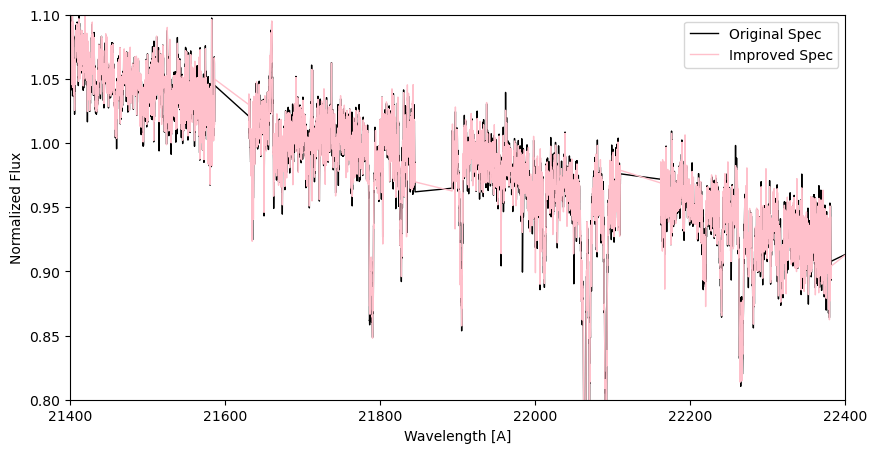

In [12]:
fig = plt.figure(figsize = (10,5), facecolor = 'white')
ax = plt.subplot(111)

ax.plot(spec_list_ori.trim_edges().stitch().wavelength, spec_list_ori.trim_edges().stitch().normalize().flux, c = 'k', lw = 1, label = 'Original Spec')
ax.plot(spec_list.trim_edges().stitch().wavelength, spec_list.trim_edges().stitch().normalize().flux, c = 'pink', lw = 1, label = 'Improved Spec')
#spec_list.stitch().plot()

ax.set_ylim(0.8, 1.10)
ax.set_xlim(21400, 22400)
ax.legend()
ax.set_ylabel('Normalized Flux')
ax.set_xlabel('Wavelength [A]')